<a href="https://colab.research.google.com/github/Seyed-Ali-Ahmadi/Python-for-Remote-Sensing/blob/master/ISA_Webinar_ML4EO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="http://uupload.ir/files/qpmy_me.png"  width="1000"/>

# ***Machine Learning for Earth Observation***


This webinar is a co-operation between **Iranian Space Agency** and **SARTech** start-up to improve the general knowledge of the remote sensing community.

At the end of this presentation you will have time to ask your questions. 


> ***Presentation files and recorded video will be uploaded at ISA website.***

---


<center><img src="http://uupload.ir/files/qav_us.png"  width="600"/>

<center><img src="http://uupload.ir/files/7j7a_alternate-machine-learning-image.png"  width="600"/>

# Introduction

A machine learning project may not be linear, but it has a number of well known steps:

* Define Problem.
* Prepare Data.
* Evaluate Algorithms.
* Improve Results.
* Present Results.

The best way to really come to terms with a new platform or tool is to work through a machine learning project end-to-end and cover the key steps. Namely, from loading data, summarizing data, evaluating algorithms and making some predictions.


![picture](http://s14.picofile.com/file/8408832218/supervised_learning_flowchart.png)


Here is an overview of what we are going to cover:

1. Installing the Python and required libraries.
2. Loading the dataset.
3. Summarizing the dataset.
4. Visualizing the dataset.
5. Evaluating some algorithms.
6. Making some predictions.





### Required Packages

There are some well-known packages which are used by the remote sensing community more often than the other ones. These packages provide basic requirements for a satellite image processing project such as image loading, georeferencing, matrix operations, image classification, data visualization, etc.

One can name much more packages which can be used in more specific projects but the most general packages are listed in the figure below. 

![](http://s14.picofile.com/file/8408928418/packages.PNG)

Let's import those packages that we want to work with.

> 1. rasterio (based on GDAL)
> 2. scikit-learn
> 3. numpy
> 4. matplotlib




In [2]:
# Some important and mostly-used packages are already installed on Google-Colab.
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Some other packages require installation.
# They can be accessed from Github; or installed using "pip".
!pip install rasterio

# After successful installation, import the package.
import rasterio as rio

In [4]:
# Some packages are very large and you don't need to import the entire library.
# Just work with those methods that you'll work through your project.
from sklearn import svm
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Introduction to Scikit-Learn

This is the [website](https://scikit-learn.org/stable/).

You can get started [here](https://scikit-learn.org/stable/getting_started.html); and find more tutorials [here](https://scikit-learn.org/stable/tutorial/index.html#tutorial-menu). Scikit-Learn also provides lots of [examples](https://scikit-learn.org/stable/auto_examples/index.html) which can be used to better understand the algorithms.

<center><img src="http://uupload.ir/files/l51z_ml_map.png"  width="2000"/>


# Problem Definition

What are we going to do?!

> Implement and end-to-end remote sensing image classification procedure in Python using open-source packages.

How are we going to do this?

> 1. Get familiar with the dataset.
> 2. Manipulate features.
> 3. Train a machine learning model (specifically **SVM**).
> 4. Evaluate the accuracy of out model.
> 5. Test our model on unseen data.

# Data Manipulation

What is the dataset we are going to work with?

* Airborne **hyperspectral** image with 48 bands (1m)
* Airborne LiDAR-derived **DSM** (resampled to 1m)
* **Ground truth** data (1m)

> *The [2018 IEEE GRSS Data Fusion Contest](http://www.grss-ieee.org/community/technical-committees/data-fusion/2018-ieee-grss-data-fusion-contest/#:~:text=The%202018%20IEEE%20GRSS%20Data,consists%20of%20a%20classification%20benchmark.), organized by the Image Analysis and Data Fusion Technical Committee, aims to promote progress on fusion and analysis methodologies for multi-source remote sensing data.*

## Data Loading

In the first step, we read our data in Python.

<center><img src="http://uupload.ir/files/5j0x_reading-and-writing-files-in-python_watermarked.png"  width="500"/>


In [5]:
# Use rasterio package to open images.
# I'm reading data from my Google Drive directory.

# Read HSI dataset
hsi = rio.open('/content/drive/My Drive/Data_Webinar/Data_HSI_1m.tif')
hsi_array = hsi.read()

# Read DSM dataset
dsm = rio.open('/content/drive/My Drive/Data_Webinar/Data_DSM_1m.tif')
dsm_array = dsm.read()

# Read GT dataset
gt = rio.open('/content/drive/My Drive/Data_Webinar/Data_GT_1m.tif')
gt_array = gt.read()

/usr/local/lib/python3.6/dist-packages/rasterio/__init__.py:221: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [9]:
gt_array.shape

(1, 536, 878)

In [10]:
# Let's see what these datasets look like.
print(hsi_array.shape)
print(dsm_array.shape)
print(gt_array.shape)

(48, 536, 878)
(1, 536, 878)
(1, 536, 878)


In [11]:
nRows = hsi_array.shape[1]
nCols = hsi_array.shape[2]
Bands = hsi_array.shape[0]

In [14]:
Bands

48

## Data Visualization

Visualization is the best way to become familiar with your dataset. Also, you can summarize the data by looking at some statistical features of the data.



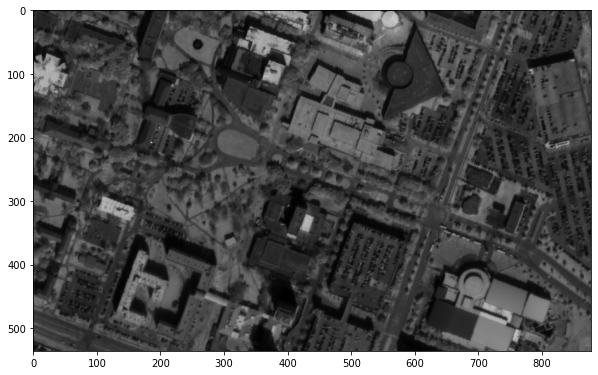

In [17]:
plt.figure(figsize=(10, 10))
plt.imshow(hsi_array[35, :, :], cmap='gray')
plt.show()

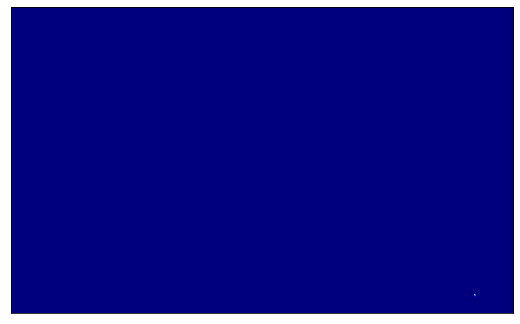

In [18]:
# Visualizing DSM
plt.figure(figsize=(9, 9))
plt.imshow(dsm_array[0, :, :], cmap='jet')
plt.xticks([])
plt.yticks([])
plt.show()

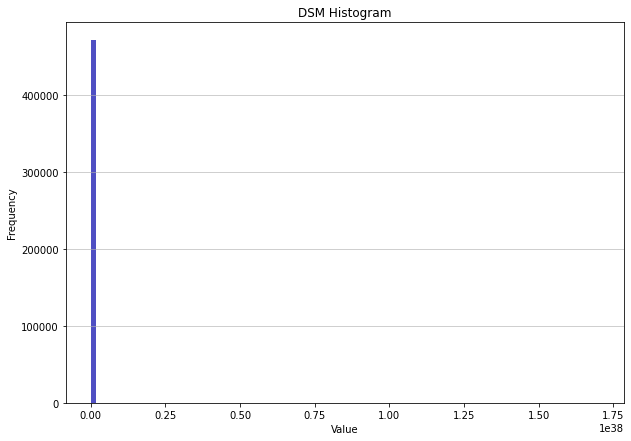

In [19]:
# What is the problem?! Let's look at it's histogram!
plt.figure(figsize=(10, 7))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('DSM Histogram')
n, bins, patches = plt.hist(x=dsm_array.flatten(), bins=100, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

In [20]:
dsm_array[dsm_array > 60] = np.nan

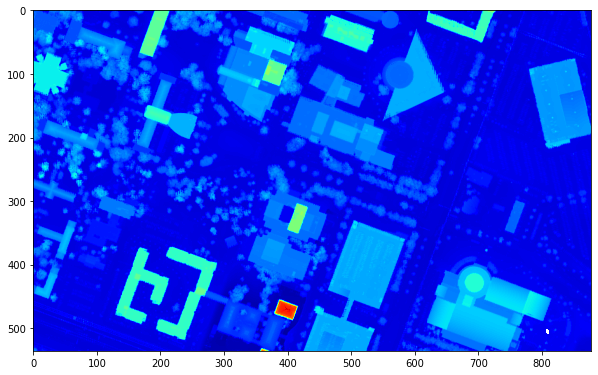

In [23]:
plt.figure(figsize=(10, 10))
plt.imshow(dsm_array[0, :, :], cmap='jet')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


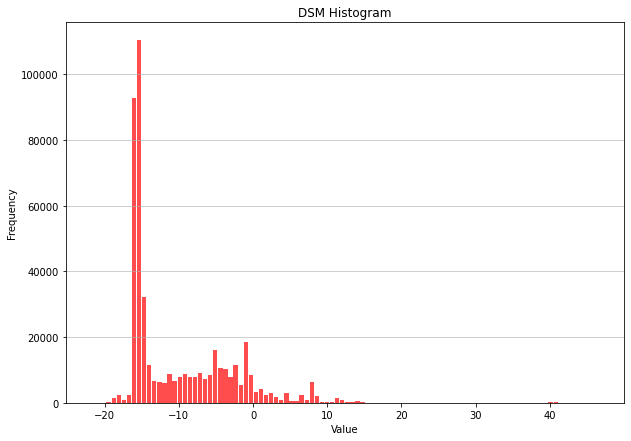

In [24]:
# Correct for incorrect values (outliers).
dsm_array[dsm_array > 50] = np.nan

plt.figure(figsize=(10, 7))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('DSM Histogram')
n, bins, patches = plt.hist(x=dsm_array.flatten(), bins=100, color='r',
                            alpha=0.7, rwidth=0.85)

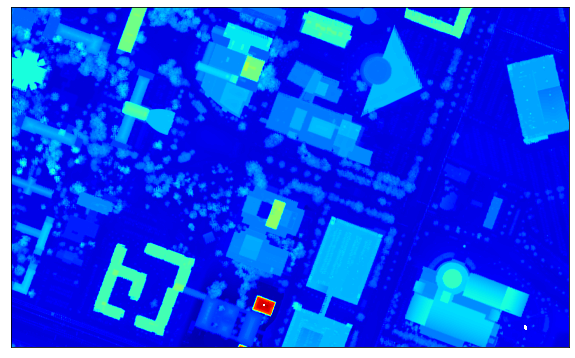

In [25]:
# Again, visualize the corrected data.
plt.figure(figsize=(10, 7))
plt.imshow(dsm_array[0, :, :], cmap='jet')
plt.xticks([])
plt.yticks([])
plt.show()

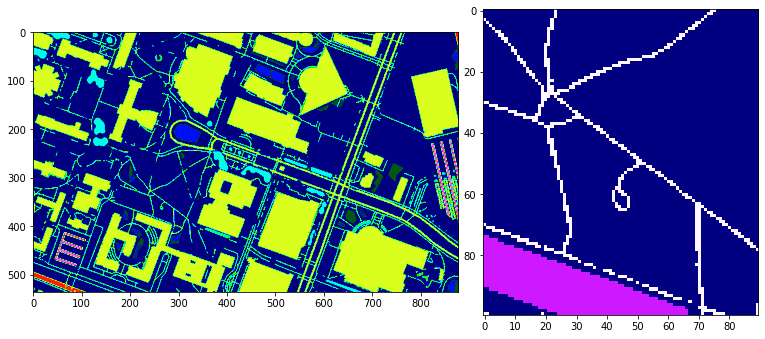

In [28]:
# OK. What's next? Ground truth data
fig = plt.figure(figsize=(13, 7))
gs = fig.add_gridspec(1, 5)
fig.add_subplot(gs[0, :3]), plt.imshow(gt_array[0, :, :], cmap='gist_ncar')
fig.add_subplot(gs[0, -2:]), plt.imshow(gt_array[0, 300:400, 220:310], cmap='gist_ncar')
plt.show()

In [33]:
list(np.unique(gt_array))


[0.0, 1.0, 2.0, 4.0, 5.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 16.0, 18.0]

In [34]:
# How many classes?
gt_array[gt_array == 7] = 0
gt_array[gt_array == 8] = 0
gt_array[gt_array == 13] = 0
classes = np.unique(gt_array)
print(classes)

[ 0.  1.  2.  4.  5.  9. 10. 11. 12. 16. 18.]


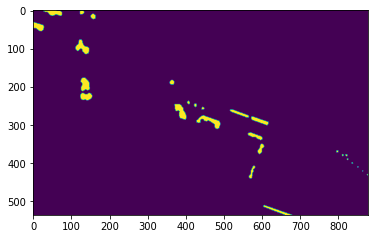

In [40]:
c = 4
cls = np.zeros((nRows, nCols), dtype=int)
cls[gt_array[0, :, :] == c] = 1

plt.figure()
plt.imshow(cls)
plt.show()

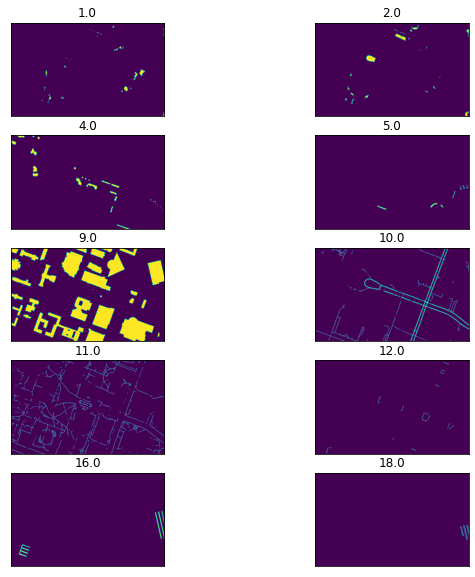

In [41]:
# Take a look at individual classes.
plt.figure(figsize=(10, 10))
plt.tight_layout()
for i in range(len(classes)):
  if i < 1: 
    continue
  C = np.zeros((nRows, nCols))
  C[gt_array[0, :, :] == classes[i]] = 1
  plt.subplot(5, 2, i)
  plt.title(str(classes[i]))
  plt.xticks([])
  plt.yticks([])
  plt.imshow(C)
plt.show()

## Train/Test Split

In order to have completely different and unique train/test samples, we divide our ground truth data into two sets of train samples and test samples.

> You can also use [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function in scikit-learn; but I prefer to write my own function.

In [42]:
gt_array = gt_array[0, :, :].astype(int)
classes = np.unique(gt_array)
print(classes)

[ 0  1  2  4  5  9 10 11 12 16 18]


In [49]:
print(gt_array.shape)
print(gt_array.flatten().shape)
print(nRows * nCols)
print(gt_array.flatten()[251236])

(536, 878)
(470608,)
470608
0


In [53]:
for i in range(20):
  if i in classes:
    print(len(np.where(gt_array.flatten() == i)[0]))

# print(len(np.where(gt_array.flatten() == 9)[0]))
# print(len(np.where(gt_array.flatten() == 2)[0]))
# print(len(np.where(gt_array.flatten() == 4)[0]))

298565
2763
4299
6730
997
128182
11892
12822
656
3091
611


In [54]:
def split_roi(gt_data, percent):
  import random

  Train = np.zeros_like(gt_data, dtype=int)
  Test = np.zeros_like(gt_data, dtype=int)
  
  labels = list(np.unique(gt_data))
  if 0 in labels: labels.remove(0) 

  for l in labels:
    ind = list(np.where(gt_data.flatten() == l)[0])

    random.shuffle(ind)
    train_inds = ind[:int(percent * len(ind))]
    test_inds = ind[int(percent * len(ind)):]

    temp = np.zeros((nRows*nCols, 1), dtype=int)
    temp[train_inds] = l
    temp = temp.reshape((nRows, nCols))
    Train = Train + temp
    
    temp = np.zeros((nRows*nCols, 1), dtype=int)
    temp[test_inds] = l
    temp = temp.reshape((nRows, nCols))
    Test = Test + temp

  return Train, Test

In [55]:
Train, Test = split_roi(gt_array, 0.7)

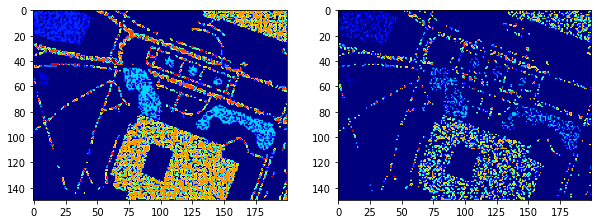

In [60]:
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(Train[200:350, 300:500], cmap='jet')
plt.subplot(122), plt.imshow(Test[200:350, 300:500], cmap='jet')
plt.show()

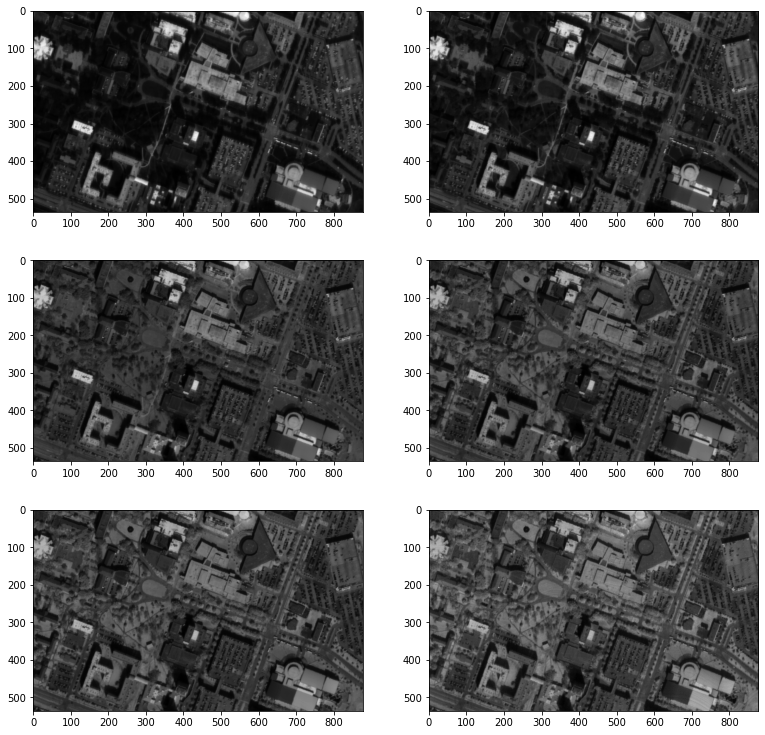

In [62]:
# Let's visualize HSI data.
# Just show a few bands out of 48
plt.figure(figsize=(13, 13))
plt.subplot(321), plt.imshow(hsi_array[5, :, :], cmap='gray')
plt.subplot(322), plt.imshow(hsi_array[15, :, :], cmap='gray')
plt.subplot(323), plt.imshow(hsi_array[25, :, :], cmap='gray')
plt.subplot(324), plt.imshow(hsi_array[30, :, :], cmap='gray')
plt.subplot(325), plt.imshow(hsi_array[35, :, :], cmap='gray')
plt.subplot(326), plt.imshow(hsi_array[47, :, :], cmap='gray')
plt.show()

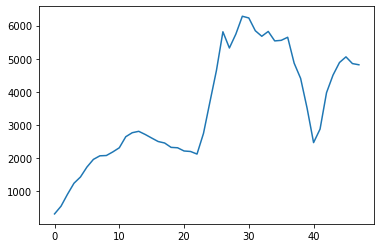

In [65]:
# Also, we can see the spectral curve of a pixel.
plt.plot(hsi_array[:, 200, 300])

In [73]:
np.mean(hsi_array[:, Train == c][:, :10], axis=1).shape

(48,)

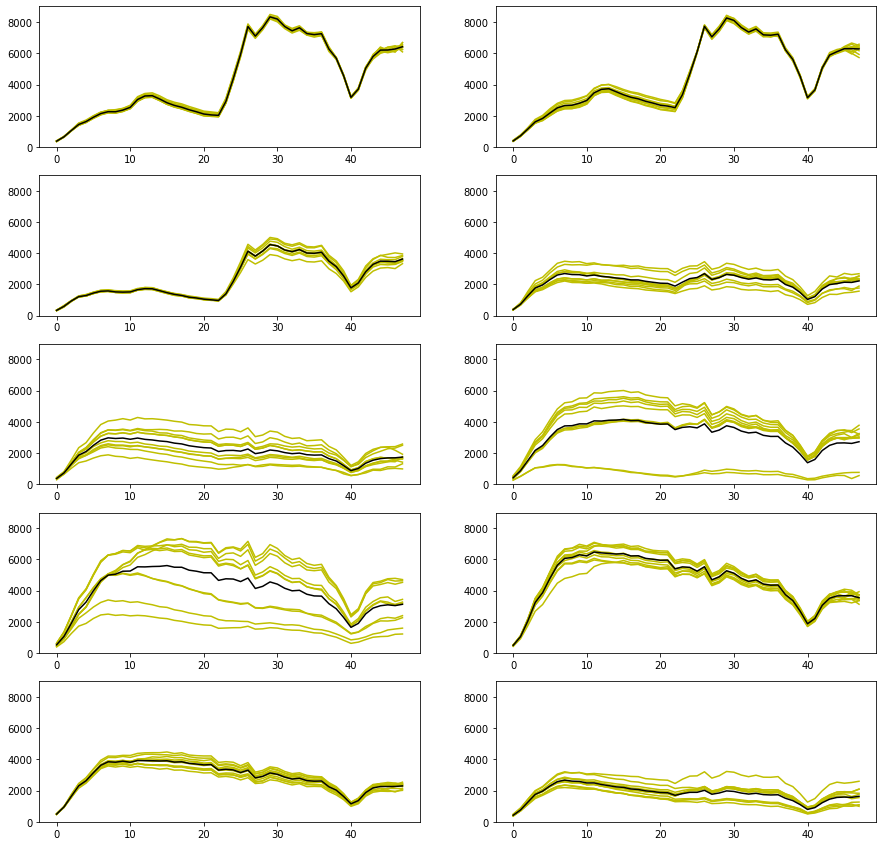

In [74]:
# Let's try it for a class.
classes = [1, 2, 4, 5, 9, 10, 11, 12, 16, 18]
plt.figure(figsize=(15, 15))
for c in classes:
  plt.subplot(5, 2, classes.index(c)+1), plt.plot(hsi_array[:, Train == c][:, :10], 'y')
  plt.plot(np.mean(hsi_array[:, Train == c][:, :10], axis=1), 'k')
  plt.ylim([0, 9000])
plt.show()

## Data Standardization

[Standardization](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling) of datasets is to make data look like Gaussian with **zero mean and unit variance**.

In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

> We are actually standardizing our datasets.

![picture](https://scikit-learn.org/stable/_images/sphx_glr_plot_all_scaling_002.png)

[Normalization](https://scikit-learn.org/stable/modules/preprocessing.html#normalization) is the process of scaling individual samples to have **unit norm**.




In [77]:
hsi_array.reshape(48, nRows * nCols).T.shape
# [ # observations (# samples / # pixels),  # features]

(470608, 48)

In [78]:
# Prepare data for machine learning operation.
hsi_data = hsi_array.reshape(48, nRows * nCols).T
dsm_data = dsm_array.reshape(1, nRows * nCols).T

Train_data = Train.reshape(1, nRows * nCols).T
Test_data = Test.reshape(1, nRows * nCols).T

print(hsi_data.shape, dsm_data.shape, Train_data.shape, Test_data.shape)

(470608, 48) (470608, 1) (470608, 1) (470608, 1)


In [82]:
# Standardizing data
scaler = StandardScaler()
hsi_standard = scaler.fit(hsi_data)
print(scaler.mean_, scaler.var_)
hsi_standard = hsi_standard.transform(hsi_data)
scaler = StandardScaler()
dsm_standard = scaler.fit(dsm_data)
print(scaler.mean_, scaler.var_)
dsm_standard = dsm_standard.transform(dsm_data)

[ 428.01749227  820.46991339 1468.70849624 2161.27006341 2497.51006145
 3023.08016438 3486.94299927 3697.06799289 3672.93599769 3746.19779519
 3722.97297751 3906.03649534 3901.5101167  3897.23005559 3842.30408323
 3822.78600874 3735.97976872 3724.42521589 3595.73522337 3533.583407
 3460.26725215 3445.08128421 3145.65708828 3394.50161493 3658.4708356
 3826.81906597 4306.98906096 3770.56393856 3974.04258746 4320.82751674
 4227.85698713 3974.84125429 3829.32186661 3921.69689211 3727.726167
 3698.18248096 3725.13657864 3203.5612803  2895.46111626 2335.93855396
 1648.10368502 1923.17624222 2649.62066518 3082.99584792 3242.5178535
 3281.98614983 3297.76391392 3310.32873857] [  15264.32707052   81115.35044454  429193.91498731 1380931.62054313
 2228327.16260743 3719769.99468712 5396340.75908602 6445333.01360445
 6664195.51027235 7080892.41869333 6855145.27843419 7148091.29805739
 6868566.53653961 6898663.0929283  6998539.27724661 7239885.05013471
 7083745.63293522 7237264.02606426 6885590.1494

In [ ]:
# You can do the same operation mannually.
# hsi_standard = np.zeros_like(hsi_data, dtype=np.float)
# for i in range(48):
#   hsi_standard[:, i] = (hsi_data[:, i] - np.mean(hsi_data[:, i])) / np.std(hsi_data[:, i])

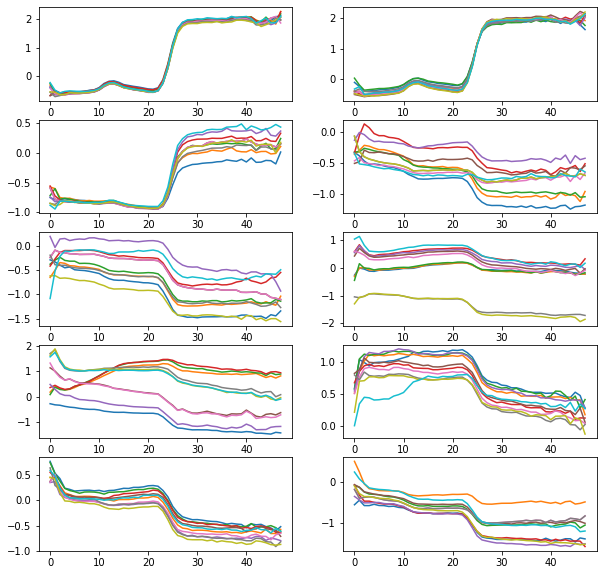

In [83]:
# See how standardization works.
plt.figure(figsize=(10, 10))
for c in classes:
  plt.subplot(5, 2, classes.index(c)+1), plt.plot(hsi_standard[Train.flatten() == c, :][:10, :].T)
plt.show()

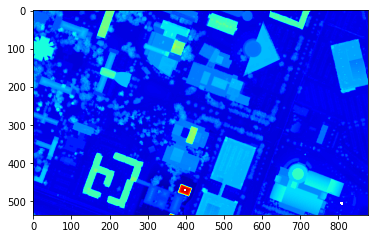

In [87]:
# Also, how is the Standard DSM?
plt.imshow(dsm_standard.reshape(nRows, nCols), cmap='jet')

# Feature Extraction

Generating new features from image is referred to as **feature extraction**.
To extract eyes and lips from a face image in order to understand that whose face is that, is an example of feature extraction. Also, finding the wheels and windows of a car to determine its type is some kind of feature extraction.

In satellite image processing, **texture images**, are an example of features extracted from an image.



# Feature Selection and Dimensionality Reduction

> (Should we do this?)

## Principal Component Analysis ([PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and [Kernel PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html))

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. 


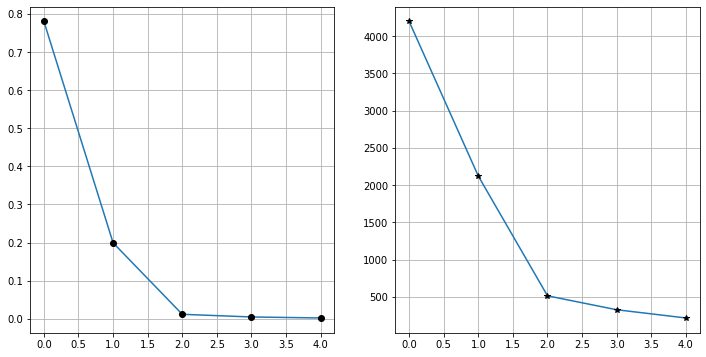

In [90]:
pca = PCA(n_components=5)   # change n components
pca.fit(hsi_standard)

variances = pca.explained_variance_ratio_
svds = pca.singular_values_

plt.figure(figsize=(12, 6))
plt.subplot(121), plt.grid(True), plt.plot(variances), plt.plot(variances, 'ok')
plt.subplot(122), plt.grid(True), plt.plot(svds), plt.plot(svds, '*k')
plt.show()

In [91]:
hsi_pca = pca.transform(hsi_standard)
print(hsi_pca.shape)

(470608, 5)


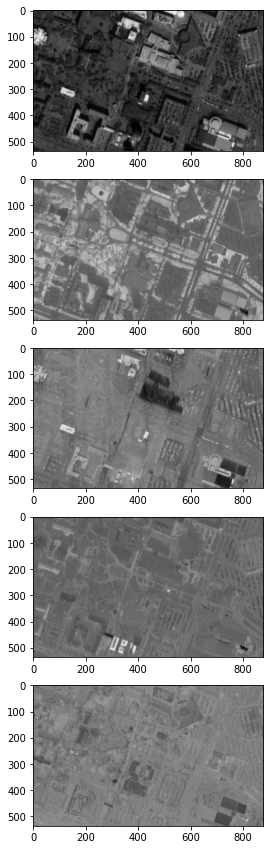

In [92]:
plt.figure(figsize=(15, 15))
plt.subplot(511), plt.imshow(hsi_pca[:, 0].reshape(nRows, nCols), cmap='gray')
plt.subplot(512), plt.imshow(hsi_pca[:, 1].reshape(nRows, nCols), cmap='gray')
plt.subplot(513), plt.imshow(hsi_pca[:, 2].reshape(nRows, nCols), cmap='gray')
plt.subplot(514), plt.imshow(hsi_pca[:, 3].reshape(nRows, nCols), cmap='gray')
plt.subplot(515), plt.imshow(hsi_pca[:, 4].reshape(nRows, nCols), cmap='gray')
plt.show()

# Classification

**Support vector machines (SVMs)** are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

* Effective in high dimensional spaces.

* Still effective in cases where number of dimensions is greater than the number of samples.

* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

* Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

* If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

* SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

> https://scikit-learn.org/stable/modules/svm.html


In [95]:
# Extract train and test samples.
features = np.hstack((hsi_standard, dsm_standard, hsi_pca[:, :3]))
print(features.shape)

features = np.nan_to_num(features)

mask_train = np.zeros((nRows, nCols), dtype=int)
mask_test = np.zeros((nRows, nCols), dtype=int)

mask_train[Train != 0] = 1
mask_test[Test != 0] = 1

# plt.figure(), plt.imshow(mask_train, cmap='gray')
# plt.figure(), plt.imshow(mask_test, cmap='gray')

train_features = features[np.where(mask_train.flatten() == 1)[0]]
test_features = features[np.where(mask_test.flatten() == 1)[0]]

train_samples = Train_data[np.where(mask_train.flatten() == 1)[0]]
test_samples = Test_data[np.where(mask_test.flatten() == 1)[0]]

(470608, 52)


In [96]:
print(train_features.shape, test_features.shape, train_samples.shape, test_samples.shape)

(120426, 52) (51617, 52) (120426, 1) (51617, 1)


In [107]:
n = np.linspace(0, train_features.shape[0], num=3000, dtype=int)

In [108]:
clf = svm.SVC(probability=False)
clf.fit(train_features[n[:-1]], train_samples[n[:-1]])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [109]:
# features = np.nan_to_num(features)
classification_map = clf.predict(features)
print(classification_map.shape)

classification_map = classification_map.reshape(nRows, nCols)
print(classification_map.shape)

(470608,)
(536, 878)


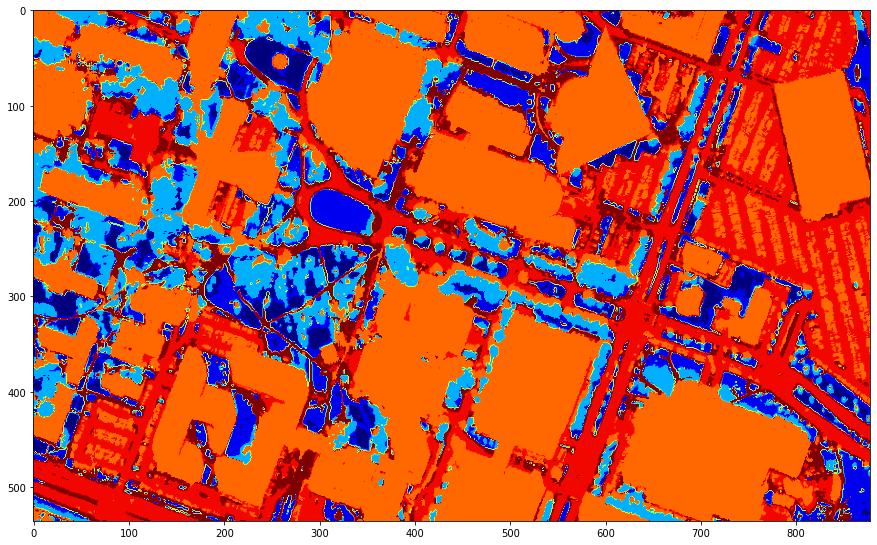

In [106]:
# 2000 samples
plt.figure(figsize=(15, 15))
plt.imshow(classification_map, cmap='jet')
plt.show()

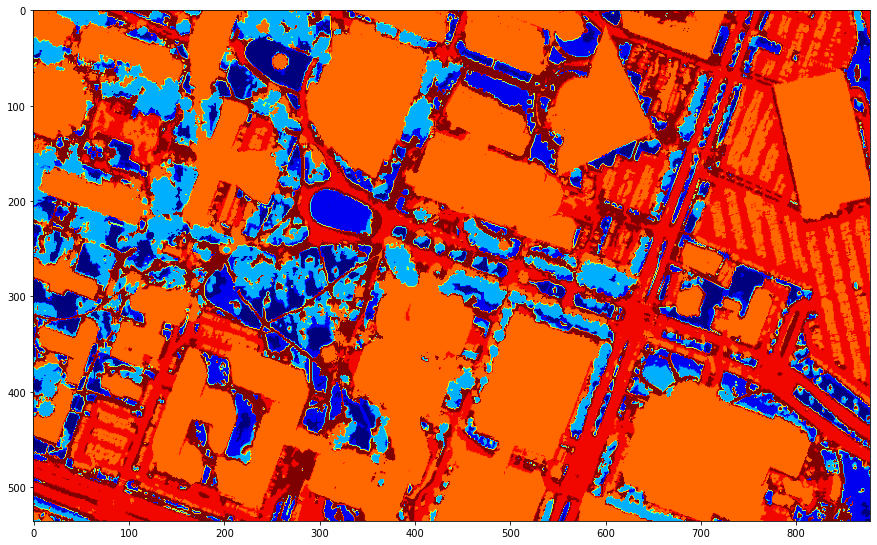

In [110]:
# 3000 samples
plt.figure(figsize=(15, 15))
plt.imshow(classification_map, cmap='jet')
plt.show()

# Accuracy Assessment



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.8802897729415581, 0.9057481062440669, 0.890365687456607, None)

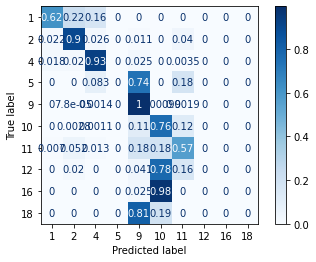

In [111]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, test_features, test_samples,
                      cmap=plt.cm.Blues, normalize='true')


from sklearn.metrics import precision_recall_fscore_support
y_pred = clf.predict(test_features)
precision_recall_fscore_support(test_samples, y_pred, average='weighted')

# Further Reading

1. https://machine-learning-with-python.readthedocs.io/en/latest/#

2. https://scipy-lectures.org/packages/scikit-learn/index.html#scikit-learn-machine-learning-in-python

3. https://cs.stanford.edu/~karpathy/svmjs/demo/


> I recommend these fantastic review papers.
<table><tr><td><img src='http://uupload.ir/files/eeqb_paper_1.png'></td><td><img src='http://uupload.ir/files/vlyo_paper_2.png'></td></tr></table>

<center><img src="http://uupload.ir/files/rxxu_introduction-to-python_watermarked.png"  width="500"/>

# ***Any Questions?***

<center><img src="http://uupload.ir/files/65gx_ml-vs-ai-whats-the-difference.png"  width="500"/>

<center><img src="http://uupload.ir/files/sm30_sartech.png"  width="700"/>

<center><img src="http://uupload.ir/files/m31u_thanks.png"  width="700"/>